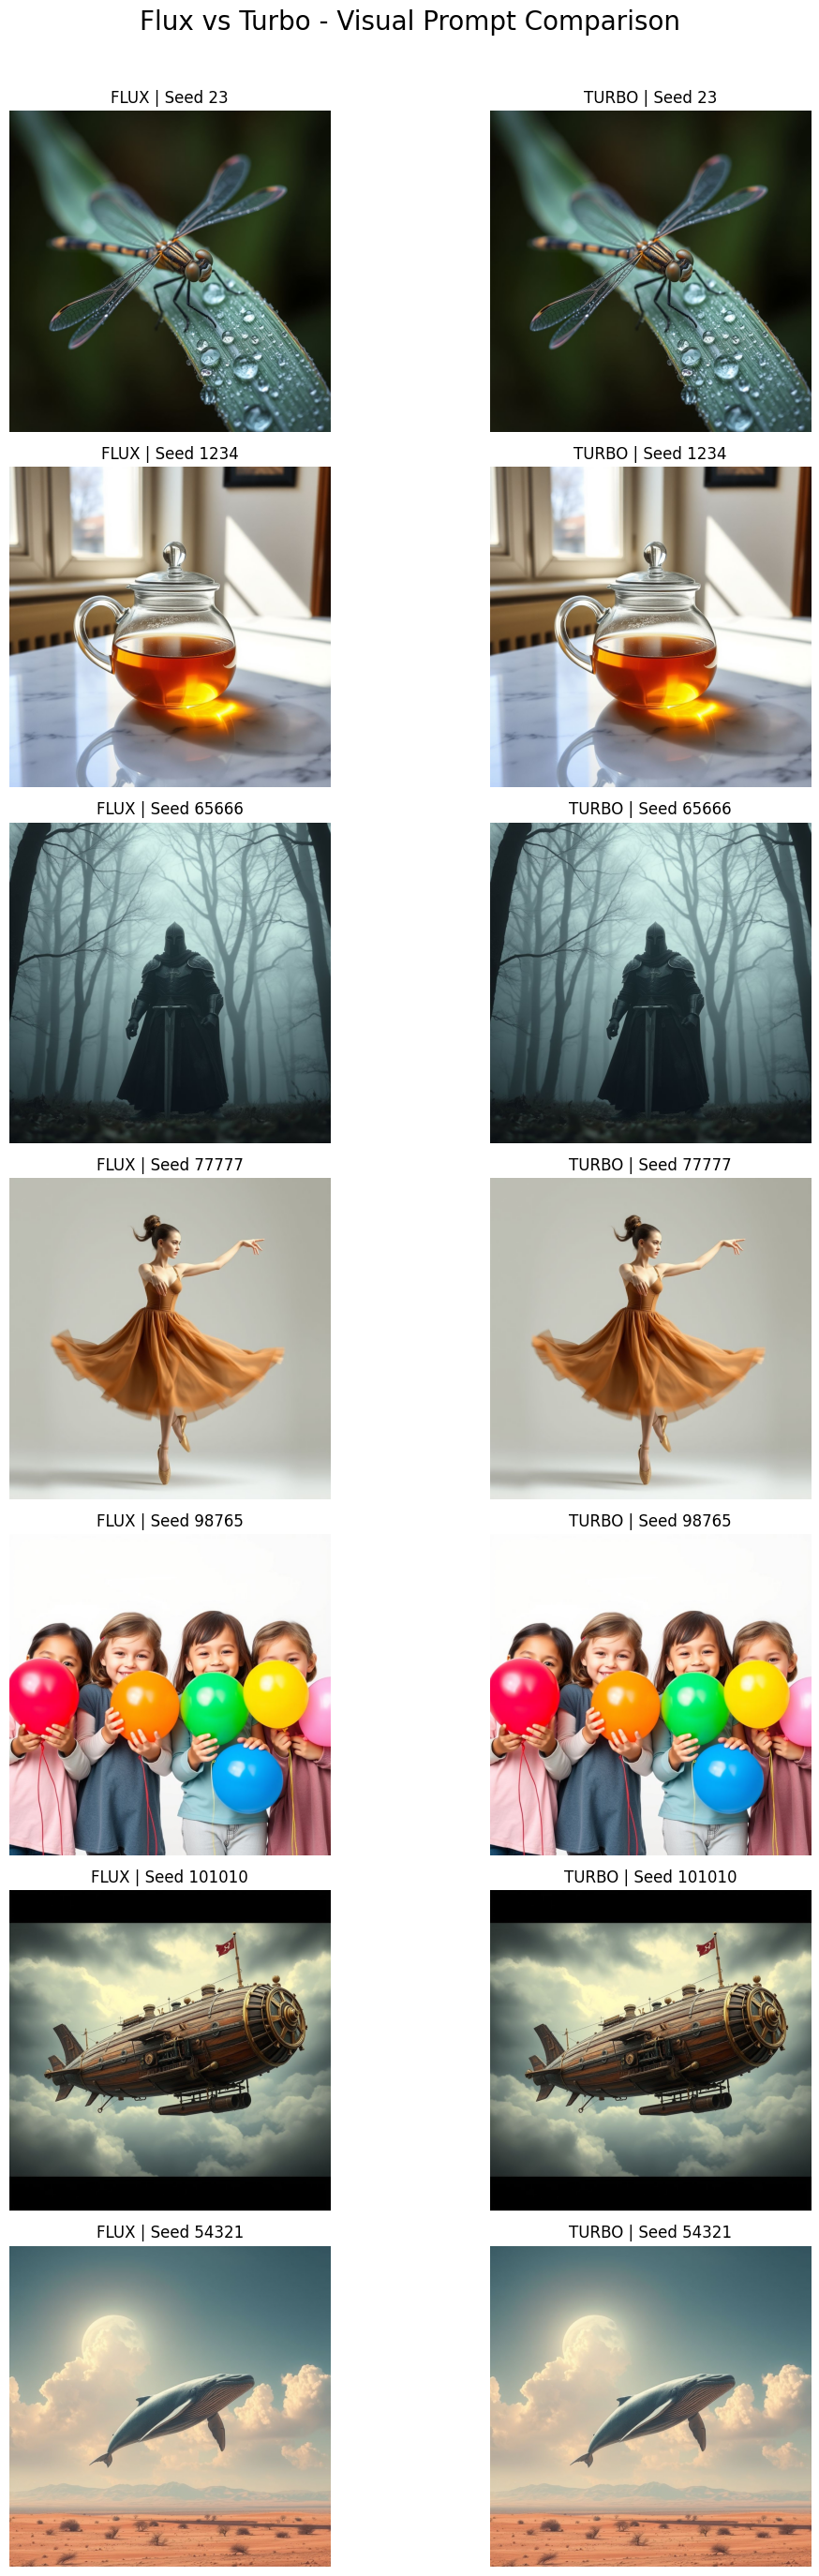

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

prompts = [
    "A close-up of a dragonfly resting on a dew-covered leaf, extreme macro shot, high texture detail, natural lighting",
    "A glass teapot with tea inside, placed on a reflective marble table, sunlight streaming through a window casting soft shadows",
    "A medieval knight standing in a foggy forest, viewed from a low angle, dramatic cinematic lighting, high depth perception",
    "A ballerina in mid-spin, wearing a flowing dress, captured in motion, realistic anatomy and motion blur",
    "A group of four children holding colorful balloons, smiling and looking at the camera, natural skin tones and accurate fingers",
    "A steampunk airship made of brass, wood, and leather, flying through cloudy skies, detailed machinery and material contrast",
    "A surreal landscape where a whale floats in the sky above a desert, hyper-realistic lighting but dreamlike elements"
]

seeds = [23, 1234, 65666, 77777, 98765, 101010, 54321]

API_URL = "https://image.pollinations.ai/prompt/"

models = ["flux", "turbo"]

def get_image(prompt, model, seed):
    url = f"{API_URL}{prompt}??model={model}&seed={seed}&nologo=true"
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

# Create figure
fig, axes = plt.subplots(len(prompts), 2, figsize=(12, len(prompts) * 4))
fig.suptitle("Flux vs Turbo - Visual Prompt Comparison", fontsize=20)

for idx, (prompt, seed) in enumerate(zip(prompts, seeds)):
    for j, model in enumerate(models):
        try:
            img = get_image(prompt, model, seed)
            axes[idx, j].imshow(img)
            axes[idx, j].set_title(f"{model.upper()} | Seed {seed}", fontsize=12)
            axes[idx, j].axis('off')
        except Exception as e:
            axes[idx, j].text(0.5, 0.5, f"Error: {e}", ha='center')
            axes[idx, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
